In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

In [227]:
# Import data of single runs 
data = pd.read_feather("sampling_base")
input_vars = pd.read_csv("input_parameters.csv")

# Import data of batch runs
data_batch1 = pd.read_feather("sampling_base_batch1")
input_vars_batch1 = pd.read_csv("input_parameters_batch1.csv")

data_batch2 = pd.read_feather("sampling_base_batch2")
input_vars_batch2 = pd.read_csv("input_parameters_batch2.csv")

data_batch2.o0 = data_batch2.o0+(len(input_vars_batch1))

data_batch = pd.concat([data_batch1,data_batch2]).reset_index()
input_vars_batch = pd.concat([input_vars_batch1,input_vars_batch2]).reset_index()

# Supporting functions
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

## Unsatisfied consumption

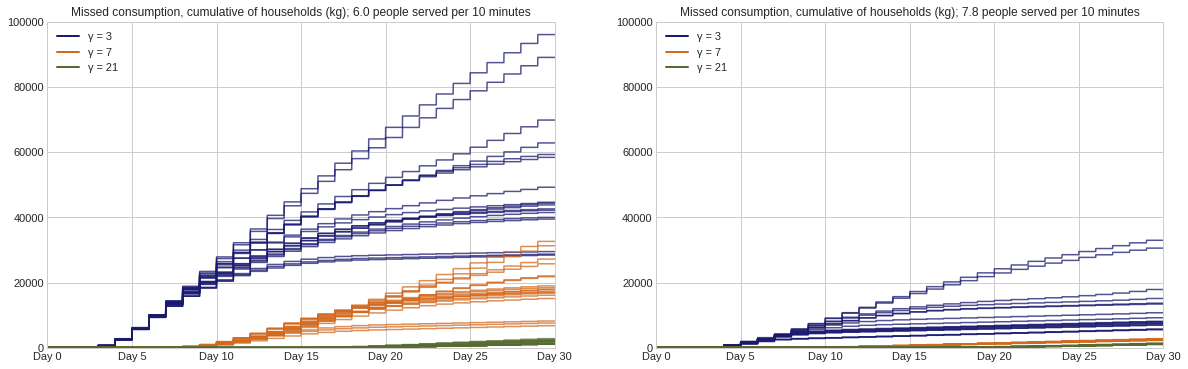

In [69]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['midnightblue', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

for i in d:    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[0].set_title("Missed consumption, cumulative of households (kg); 6.0 people served per 10 minutes")
        else:
            ax[1].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[1].set_title("Missed consumption, cumulative of households (kg); 7.8 people served per 10 minutes")
      
for a in ax:
    a.set_xticks(ticks_labels(5)[0])
    a.set_xticklabels(ticks_labels(5)[1])
    a.set_xlim([0,4320])
    a.set_ylim([-200,100000])
    a.legend(lines, labels,loc='upper left')

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

### Clusterplot for sc=7.8 and gamma=3

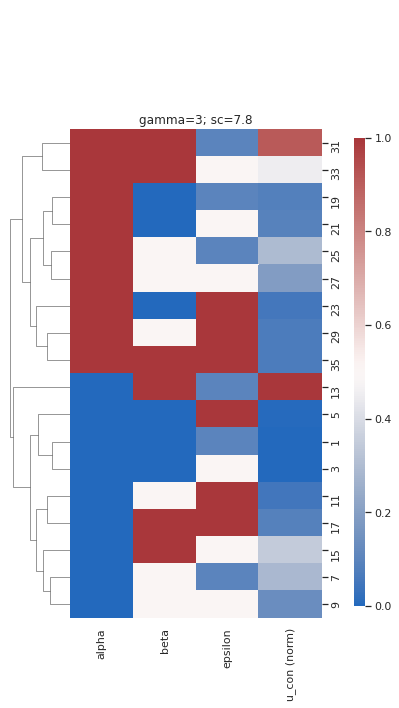

In [157]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==3].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,10),col_cluster=False,cmap='vlag')
fig.ax_heatmap.set_title('gamma=3; sc=7.8')
fig.savefig("/home/daan/Desktop/clustermap_uc_g3sc78.png")

### Clusterplot for sc=7.8 and gamma=7

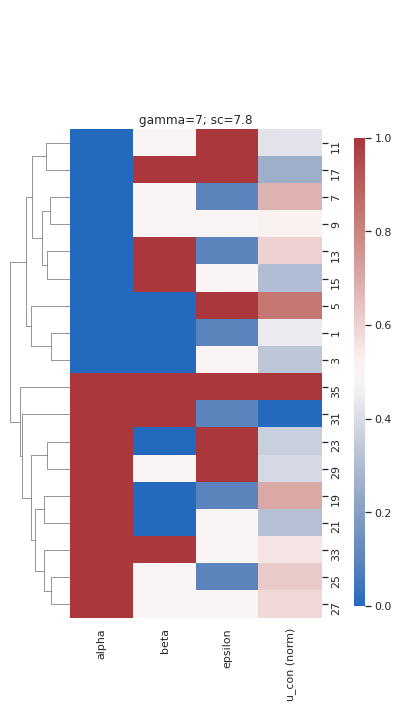

In [156]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,10),col_cluster=False,cmap='vlag')
fig.ax_heatmap.set_title('gamma=7; sc=7.8')
fig.savefig("/home/daan/Desktop/clustermap_uc_g7sc78.png")

### Clusterplot for sc=6.0 and gamma=7

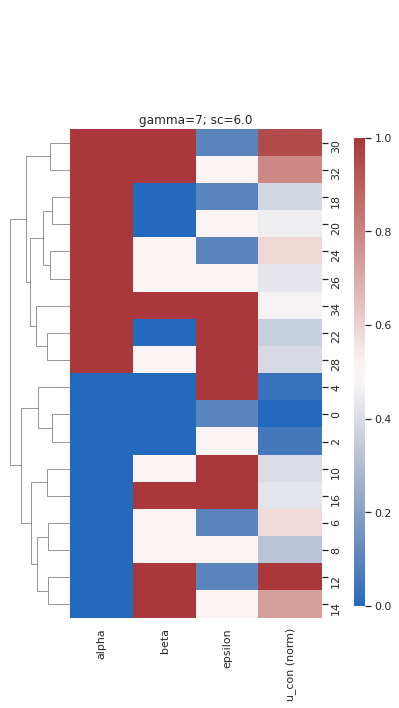

In [155]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,10),col_cluster=False,cmap='vlag')
fig.ax_heatmap.set_title('gamma=7; sc=6.0')
fig.savefig("/home/daan/Desktop/clustermap_uc_g7sc6.0.png")

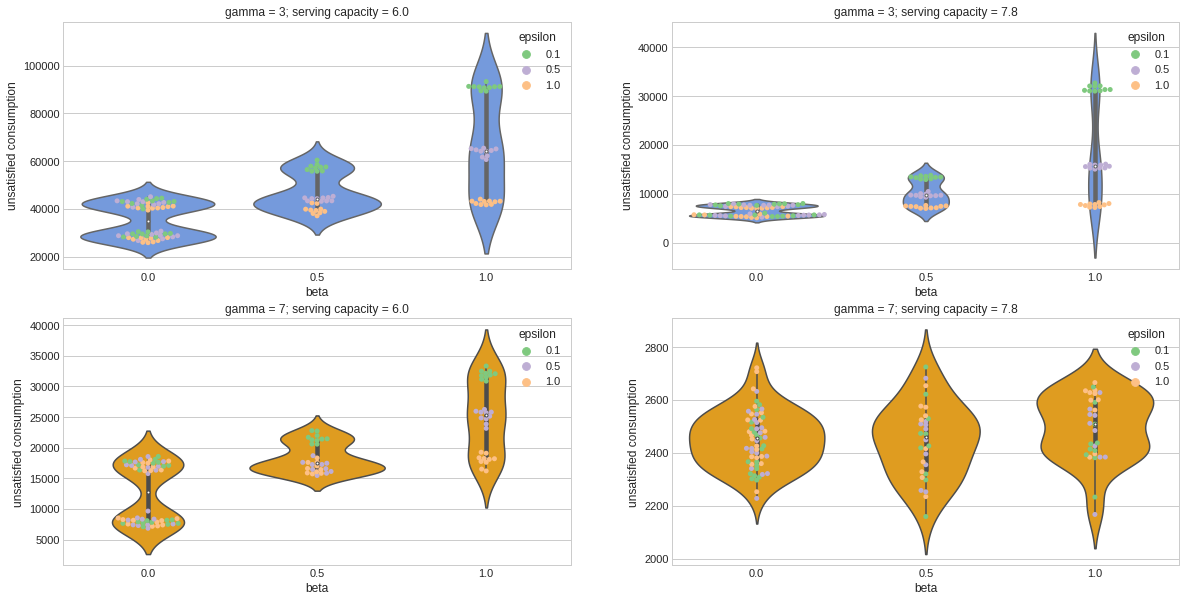

In [248]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
plt.style.use("seaborn-whitegrid")
uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars_batch.index:
    uc_endvals_dict["unsatisfied consumption"].append(data_batch.o1[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
        
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]))

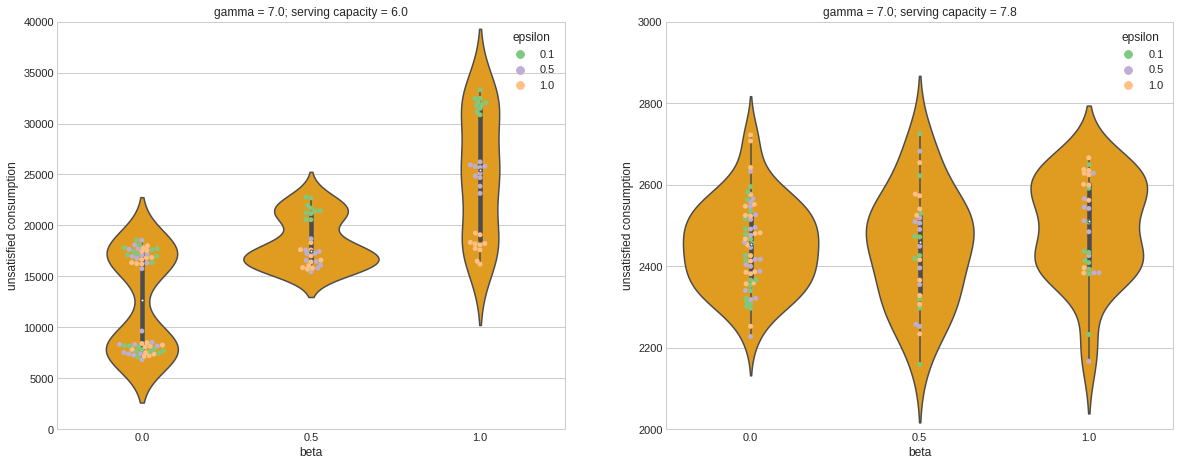

In [275]:
fig, ax = plt.subplots(1,2,figsize=(20,7.5))
plt.style.use("seaborn-whitegrid")
uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars_batch.index:
    uc_endvals_dict["unsatisfied consumption"].append(data_batch.o1[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

gammas = [7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]


    tmp2 = tmp1[tmp1.gamma==7.0]
    sns.swarmplot(ax=ax[s] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[s], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][1])

    ax[s].set_title("gamma = 7.0; serving capacity = %s"%scs[s])
ax[0].set_ylim([0,40000])
ax[1].set_ylim([2000,3000]);

(1500.0, 9500.0)

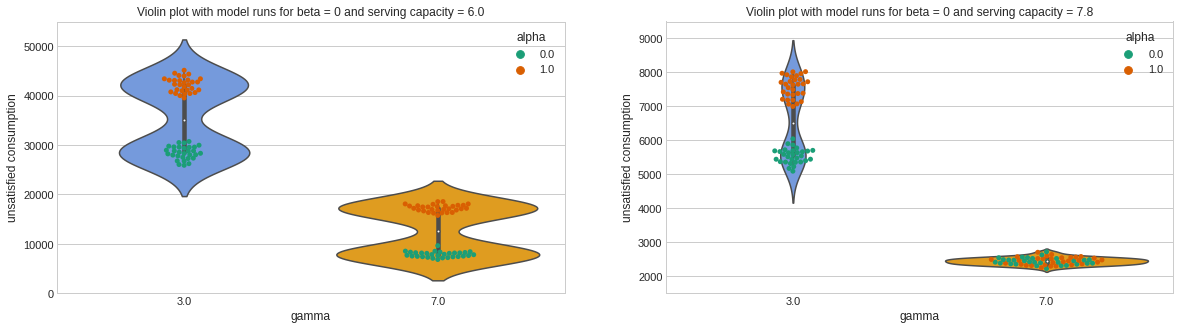

In [268]:
fig, ax = plt.subplots(1,2,figsize=(20,5))



my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.beta==0.0]

gammas = [6.0,7.8]
for g in range(len(gammas)):
    
    tmp2 = tmp1[tmp1.parallel_served_full==gammas[g]]
    sns.swarmplot(ax=ax[g] ,x="gamma", y="unsatisfied consumption", data=tmp2,hue='alpha',palette='Dark2')
    sns.violinplot(ax=ax[g], x="gamma", y="unsatisfied consumption", data=tmp2,palette=my_palette['light'])
    ax[g].set_title("Violin plot with model runs for beta = 0 and serving capacity = %s"%gammas[g])
ax[0].set_ylim([0,55000])
ax[1].set_ylim([1500,9500])

## Food waste

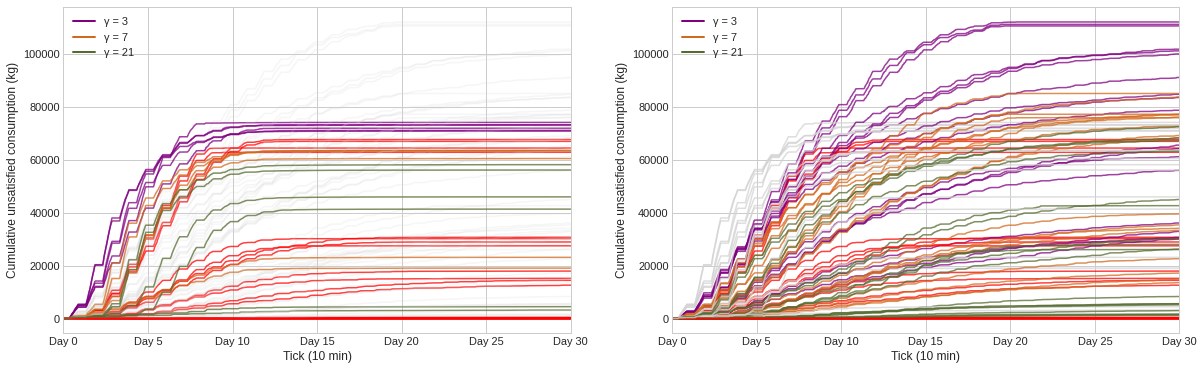

In [214]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

for i in d:    
    
    for a in ax:
        a.set_xlim([0,4320])
        a.set_ylabel("Missed consumption, cum. of households (kg)")
        a.set_xticks(ticks_labels(5)[0])
        a.set_xticklabels(ticks_labels(5)[1])
    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, data.o2[data.o0==j],color=colors[i], alpha=.75)
            
        else:
            if input_vars.epsilon[j] < 1.0:
                ax[0].plot( x, data.o2[data.o0==j],color='red', alpha=.75)
                ax[1].plot( x, data.o2[data.o0==j],color='red', alpha=.75)
            else:
                ax[0].plot( x, data.o2[data.o0==j],color=colors[i], alpha=.75)
                ax[1].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

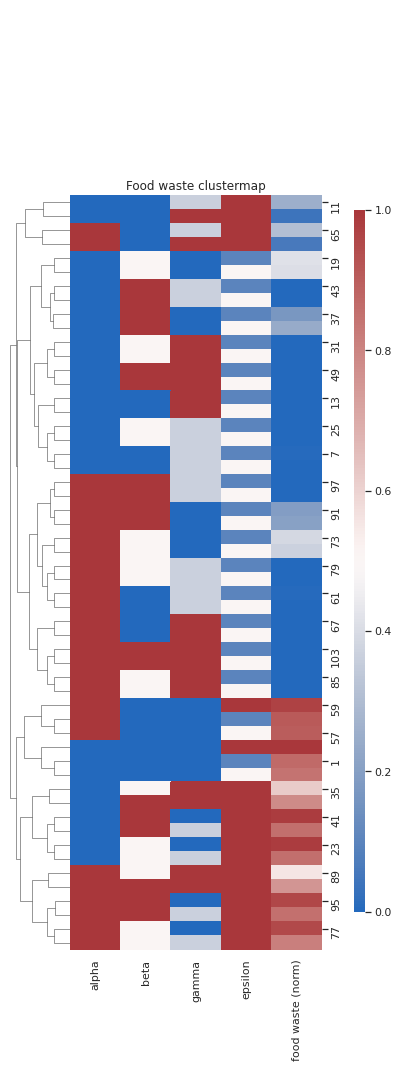

In [246]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["food waste (norm)"] = list()
filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["food waste (norm)"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

filtered_input_vars["food waste (norm)"] = normalise(filtered_input_vars["food waste (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,9,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,15),col_cluster=False,cmap='vlag')
fig.ax_heatmap.set_title('Food waste clustermap')
fig.savefig("/home/daan/Desktop/clustermap_foodwaste.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


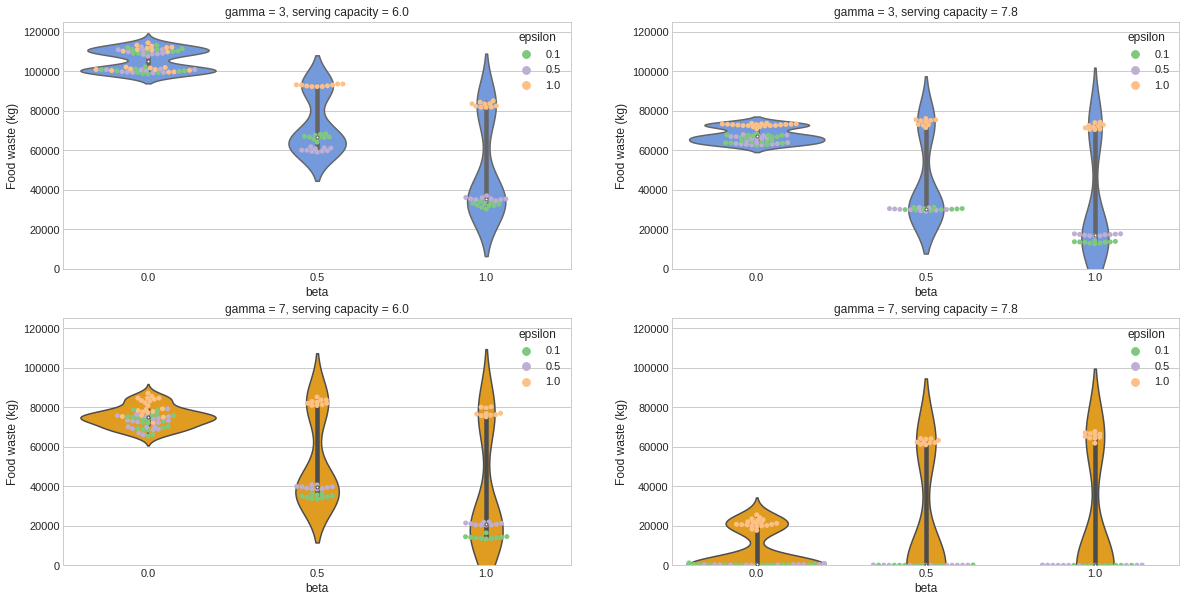

In [277]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

uc_endvals_dict = {}
uc_endvals_dict["Food waste (kg)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars_batch.index:
    uc_endvals_dict["Food waste (kg)"].append(data_batch.o2[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="Food waste (kg)", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="Food waste (kg)", data=tmp2,color=my_palette['light'][g])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]))
        ax[g,s].set_ylim([0,125e3])


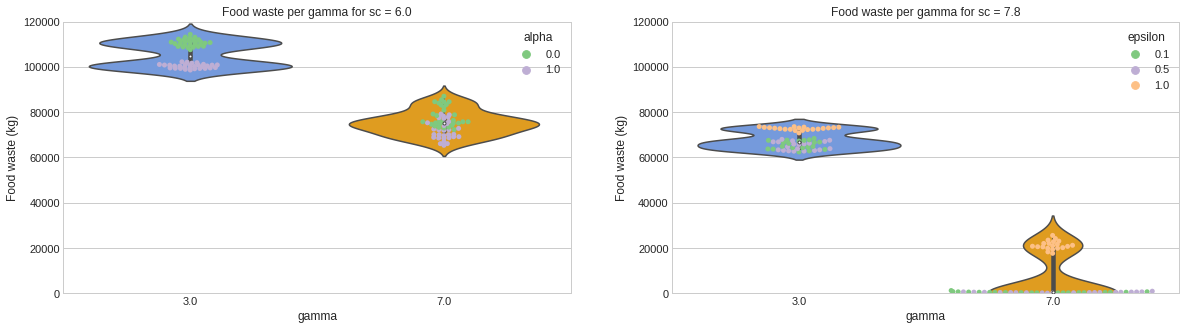

In [281]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

tmp = input_vars_batch_filtered[input_vars_batch_filtered.beta==0.0]

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [6.0,7.8]
filterfor = ['alpha','epsilon']
for g in range(len(gammas)):
    tmp2 = tmp[tmp.parallel_served_full==gammas[g]]

    sns.swarmplot(ax=ax[g] ,x="gamma", y="Food waste (kg)", data=tmp2,hue=filterfor[g],palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[g], x="gamma", y="Food waste (kg)", data=tmp2,palette=my_palette['light'])

    ax[g].set_ylim([0,12e4])
    ax[g].set_title("Food waste per gamma for sc = %s"%gammas[g])

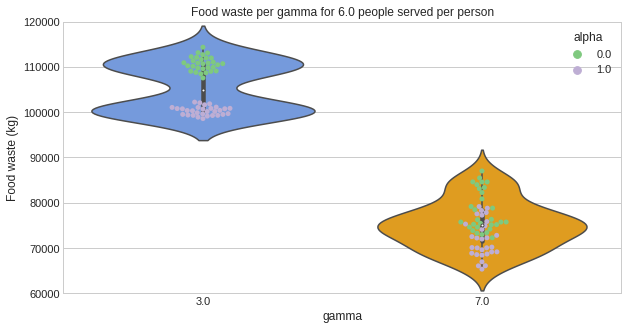

In [293]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

tmp2 = tmp[tmp.beta==0.0]

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [6.0,7.8]
filterfor = ['alpha','epsilon']
tmp2 = tmp2[tmp2.parallel_served_full==gammas[0]]

sns.swarmplot(ax=ax ,x="gamma", y="Food waste (kg)", data=tmp2,hue=filterfor[0],palette='Accent')#palette=my_palette['dark'])
sns.violinplot(ax=ax, x="gamma", y="Food waste (kg)", data=tmp2,palette=my_palette['light'])

ax.set_ylim([6e4,12e4])
ax.set_title("Food waste per gamma for %s people served per 10 minutes"%gammas[0]);

## Queuing

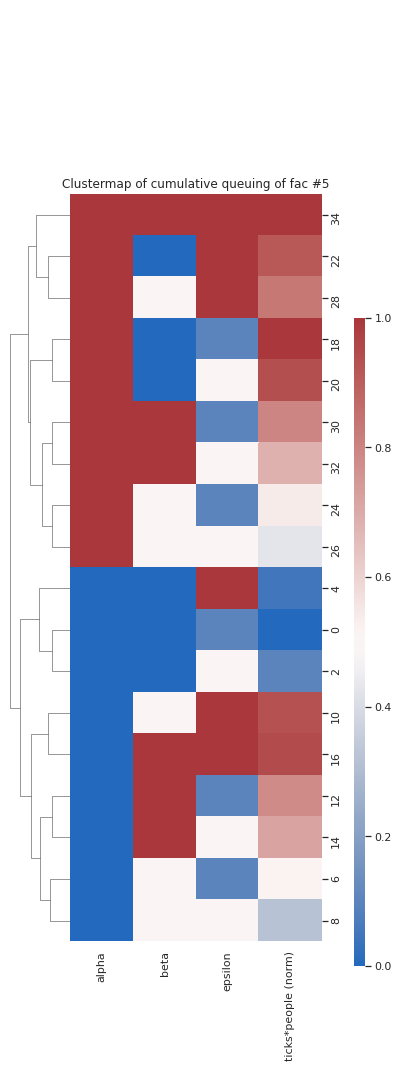

In [296]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==7.0].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data[data.o0==j].iloc[:,9]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
fig.ax_heatmap.set_title('Clustermap of cumulative queuing of fac #5');
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

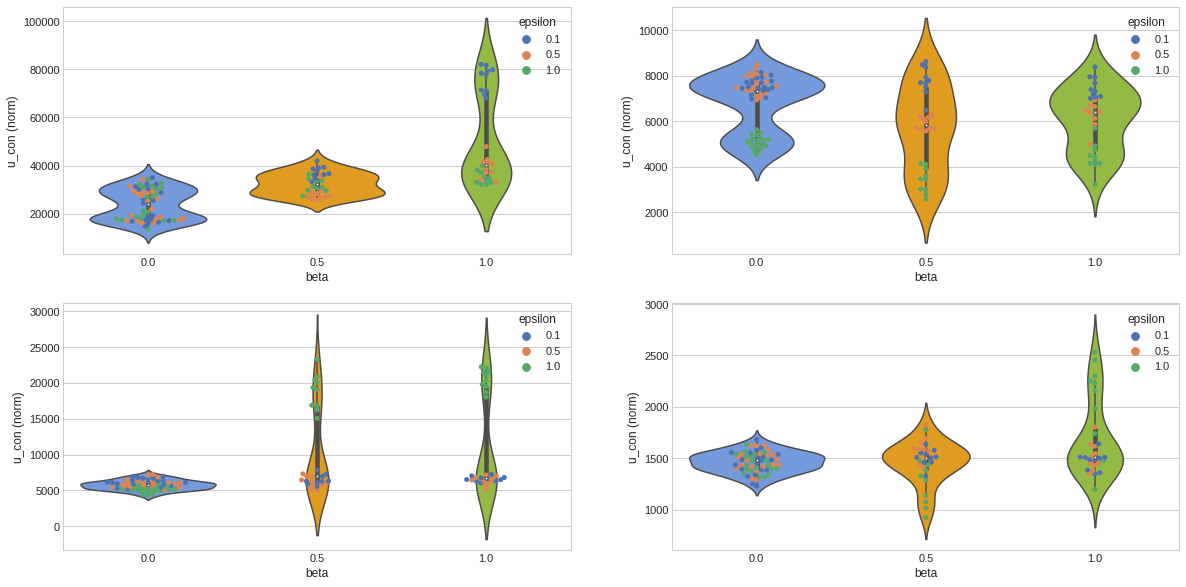

In [300]:
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(2,2,figsize=(20,10))


uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()

for j in input_vars_batch.index:
    uc_endvals_dict["u_con (norm)"].append( np.sum(data_batch[data_batch.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="u_con (norm)", data=tmp2,hue='epsilon')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="u_con (norm)", data=tmp2,palette=my_palette['light'])


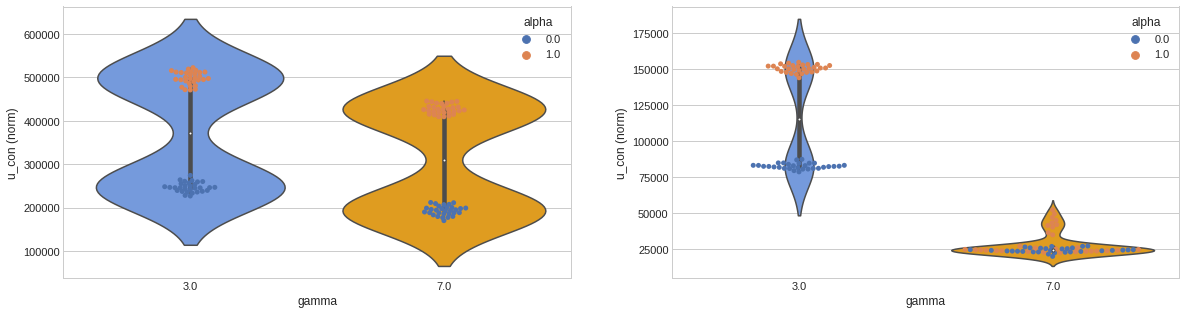

In [124]:
fig, ax = plt.subplots(1,2,figsize=(20,5))


uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars_batch1.index:
    uc_endvals_dict["u_con (norm)"].append( np.sum(data_batch1[data_batch1.o0==j].iloc[:,9]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered1 = pd.concat([input_vars_batch1,uc_endvals_df],axis=1)

uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in input_vars_batch2.index:
    uc_endvals_dict["u_con (norm)"].append( np.sum(data_batch2[data_batch2.o0==j].iloc[:,9]))    
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered2 = pd.concat([input_vars_batch2,uc_endvals_df],axis=1)

input_vars_batch_filtered = pd.concat([input_vars_batch_filtered1,input_vars_batch_filtered2])
# input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.alpha==0.0]
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.beta==0.0]
# input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==6.0]


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']


gammas = [6.0,7.8]
for g in range(len(gammas)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gammas[g]]
    sns.swarmplot(ax=ax[g] ,x="gamma", y="u_con (norm)", data=tmp,hue='alpha')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[g], x="gamma", y="u_con (norm)", data=tmp,palette=my_palette['light'])


# ax = sns.swarmplot(x="gamma", y="u_con (norm)", data=input_vars_batch_filtered,hue='alpha')#palette=my_palette['dark'])
# ax = sns.violinplot(x="gamma", y="u_con (norm)", data=input_vars_batch_filtered,palette=my_palette['light'])


In [117]:
q_sum1 = list()
n_facs = 12
for j in input_vars_batch1.index:
#     uc_endvals_dict["u_con (norm)"].append(data_batch2.o2[data_batch2.o0==j].iloc[-1])
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data_batch1[data_batch1.o0==j].iloc[:,i+4]))  
    
    q_sum1.append(tmp_sum)
    
q_sum2 = list()
n_facs = 12
for j in input_vars_batch2.index:
#     uc_endvals_dict["u_con (norm)"].append(data_batch2.o2[data_batch2.o0==j].iloc[-1])
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data_batch2[data_batch2.o0==j].iloc[:,i+4]))  
    
    q_sum2.append(tmp_sum)


    

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


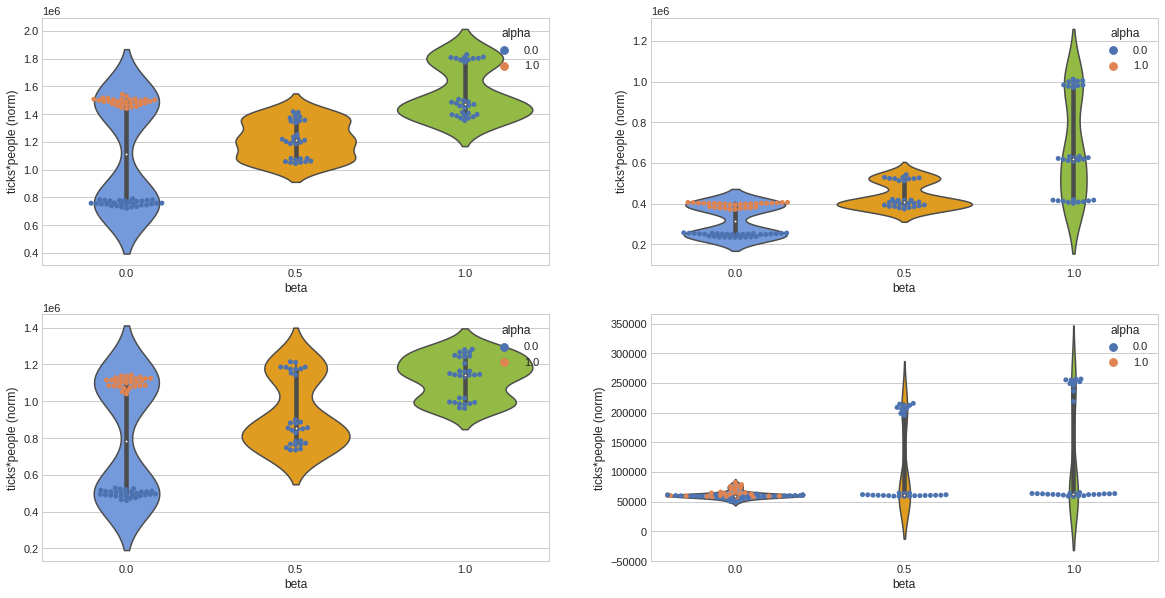

In [151]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars_batch1.index:
#     uc_endvals_dict["u_con (norm)"].append(data_batch1.o2[data_batch1.o0==j].iloc[-1])
#     uc_endvals_dict["u_con (norm)"].append( np.sum(data_batch1[data_batch1.o0==j].iloc[:,9]))
    
    uc_endvals_dict["ticks*people (norm)"].append( q_sum1[j] )


uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered1 = pd.concat([input_vars_batch1,uc_endvals_df],axis=1)

uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in input_vars_batch2.index:
#     uc_endvals_dict["u_con (norm)"].append(data_batch1.o2[data_batch1.o0==j].iloc[-1])
#     uc_endvals_dict["u_con (norm)"].append( np.sum(data_batch1[data_batch1.o0==j].iloc[:,9]))
    
    uc_endvals_dict["ticks*people (norm)"].append( q_sum2[j] )
    
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered2 = pd.concat([input_vars_batch2,uc_endvals_df],axis=1)

input_vars_batch_filtered = pd.concat([input_vars_batch_filtered1,input_vars_batch_filtered2])
# input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.alpha==0.0]
# input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==6.0]


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people (norm)", data=tmp2,hue='alpha')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people (norm)", data=tmp2,palette=my_palette['light'])


In [120]:
## Walking distance

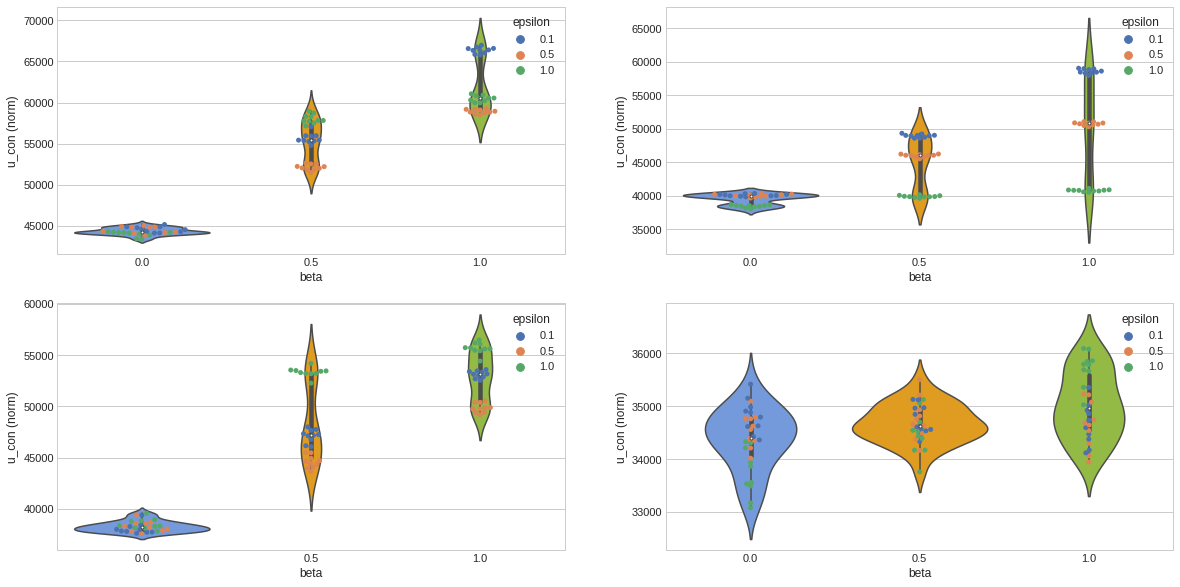

In [150]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars_batch1.index:
    uc_endvals_dict["u_con (norm)"].append(data_batch1.o3[data_batch1.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered1 = pd.concat([input_vars_batch1,uc_endvals_df],axis=1)

uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in input_vars_batch2.index:
    uc_endvals_dict["u_con (norm)"].append(data_batch2.o3[data_batch2.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered2 = pd.concat([input_vars_batch2,uc_endvals_df],axis=1)

input_vars_batch_filtered = pd.concat([input_vars_batch_filtered1,input_vars_batch_filtered2])
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.alpha==0.0]
# input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==6.0]


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="u_con (norm)", data=tmp2,hue='epsilon')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="u_con (norm)", data=tmp2,palette=my_palette['light'])
